In [17]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
img1 = cv2.imread('DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [19]:
img1.shape, img2.shape

((1401, 934, 3), (1280, 1277, 3))

#### Blending images of the same size

In [20]:
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

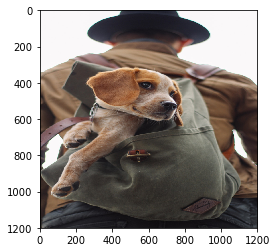

In [21]:
plt.imshow(img1)

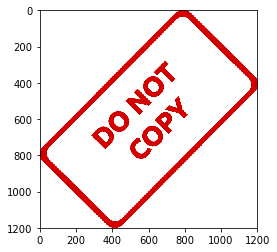

In [22]:
plt.imshow(img2)

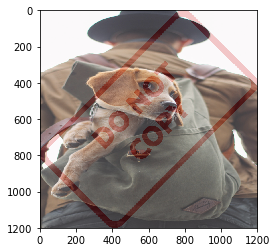

In [23]:
blended = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.2, gamma=0)
plt.imshow(blended);

#### Overlay a small image on top of a larger image (No blending)
* Numpy reassignment operation

In [54]:
img1 = cv2.imread('DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [55]:
img2 = cv2.resize(img2, (600,600))

In [56]:
large_img = img1 
small_img = img2

In [57]:
x_offset = 30
y_offset = 30

In [58]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [59]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

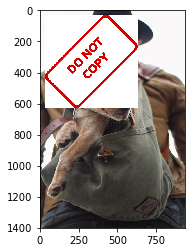

In [61]:
plt.imshow(large_img);

#### Blend together images of different sizes

In [64]:
img1 = cv2.imread('DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [65]:
img2 = cv2.resize(img2, (600,600))

In [67]:
img1.shape

(1401, 934, 3)

In [68]:
x_offset = 934-600
y_offset = 1401-600

In [69]:
rows,cols,channels = img2.shape

In [71]:
rows,cols,channels

(600, 600, 3)

In [72]:
roi = img1[y_offset:1401, x_offset:934]

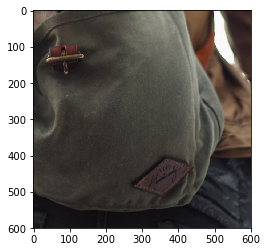

In [73]:
plt.imshow(roi)

In [74]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

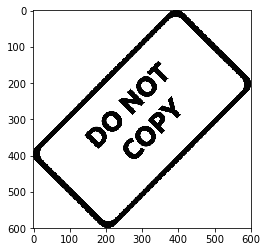

In [78]:
plt.imshow(img2gray,cmap='gray');

In [82]:
mask_inv = cv2.bitwise_not(img2gray)

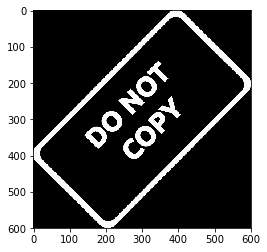

In [84]:
plt.imshow(mask_inv, cmap='gray');

In [85]:
import numpy as np

In [86]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [87]:
white_background.shape

(600, 600, 3)

In [88]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [90]:
bk.shape

(600, 600, 3)

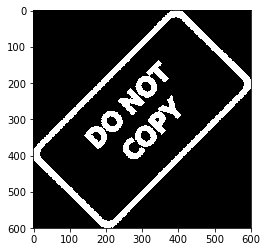

In [89]:
plt.imshow(bk)

In [91]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

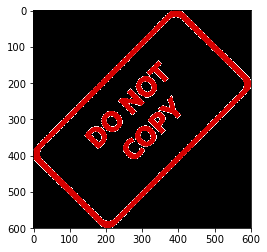

In [92]:
plt.imshow(fg)

In [93]:
final_roi = cv2.bitwise_or(roi, fg)

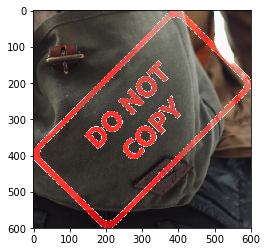

In [94]:
plt.imshow(final_roi)

In [95]:
large_img = img1
small_img = final_roi

In [96]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

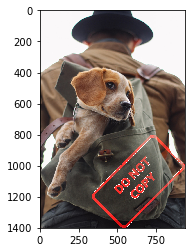

In [98]:
plt.imshow(large_img)